# Homework 0

This serves as your **zeroth** "homework" for the class. Give it a try yourself and let me know if you have any questions! 

In [1]:
# load numerical packages
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Uniform Density Shaping

Lets walk through a simple scientific computing problem together. We're going to build a simply density shaping function.

Numpy gives us a wonderful `random` library we can use. Lets focus on just one piece. We're going to pretend we only have access to one function: `rand`. Lets see how it works: 

In [2]:
np.random.rand?

Docstring:
rand(d0, d1, ..., dn)

Random values in a given shape.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `random_sample`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

Create an array of the given shape and populate it with
random samples from a uniform distribution
over ``[0, 1)``.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    If no argument is given a single Python float is returned.

Returns
-------
out : ndarray, shape ``(d0, d1, ..., dn)``
    Random values.

See Also
--------
random

Examples
--------
>>> np.random.rand(3,2)
array([[ 0.14022471,  0.96360618],  #random
       [ 0.37601032,  0.25528411],  #random
       [ 0.49313049,  0.94909878]]) #random
Type:      builtin_function_or_method


This function drawns numbers **uniformly** between $[0,1]$. Lets draw one:

In [3]:
np.random.rand()

0.1769431807633962

Lets draw $100$ samples, and use `matplotlib`'s `hist` function to visualize them:

(array([12.,  7.,  9.,  8.,  9.,  5., 13., 14., 10., 13.]),
 array([0.00312198, 0.10198985, 0.20085772, 0.29972559, 0.39859346,
        0.49746133, 0.5963292 , 0.69519707, 0.79406494, 0.89293281,
        0.99180067]),
 <BarContainer object of 10 artists>)

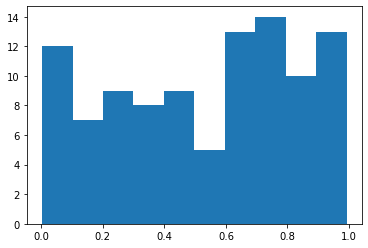

In [9]:
x = np.random.rand(100)
plt.hist(x)

`Seaborn` gives us many powerful built in utility function. A very useful one is its `distplot` function:

In [8]:
sns.distplot?

Signature:
sns.distplot(
    a=None,
    bins=None,
    hist=True,
    kde=True,
    rug=False,
    fit=None,
    hist_kws=None,
    kde_kws=None,
    rug_kws=None,
    fit_kws=None,
    color=None,
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None,
    x=None,
)
Docstring:
DEPRECATED: Flexibly plot a univariate distribution of observations.

.. warning::
   This function is deprecated and will be removed in a future version.
   Please adapt your code to use one of two new functions:

   - :func:`displot`, a figure-level function with a similar flexibility
     over the kind of plot to draw
   - :func:`histplot`, an axes-level function for plotting histograms,
     including with kernel density smoothing

This function combines the matplotlib ``hist`` function (with automatic
calculation of a good default bin size) with the seaborn :func:`kdeplot`
and :func:`rugplot` functions. It can also fit ``scipy.stats``
distributions and plot the estimated PDF

Lets use it to plot our histogram, and an estimated *density*:

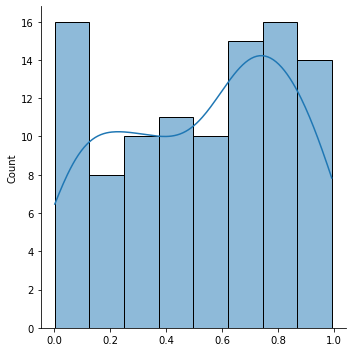

In [15]:
ax = sns.displot(x, kde=True)

What do we expect them to look like? Draw more samples and verify:

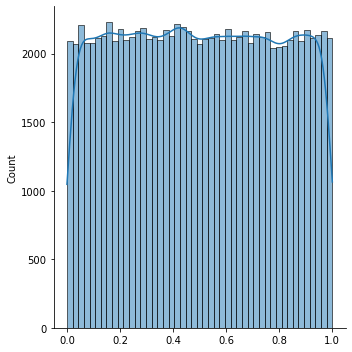

In [16]:
ax = sns.displot(np.random.rand(100000), kde=True)

Ok, so we're confident that `rand` is indeed working correctly. 

Now for the fun parts! 

We're going to use `rand` to draw samples uniformly between some arbitrary $[a,b]$, and verify that it is indeed working. 

Create a function `myrand` which allows someone to do the above.

In [17]:
def myrand(n, a, b):
    x = np.random.rand(n)
    y = a + x * (b-a)
    return y

Use your `myrand` function to draw $1000$ samples between $[3,10]$:

In [21]:
y = myrand(1000, 3, 10)

# Coin Flipping

Now were going to do something more *subtle*. 

Lets use `rand` to flip a **fair** coin:

In [26]:
y = myrand(10000, 0, 1)
fair = [1 if i >= 0.5 else 0 for i in y]

Now plot it to verify:

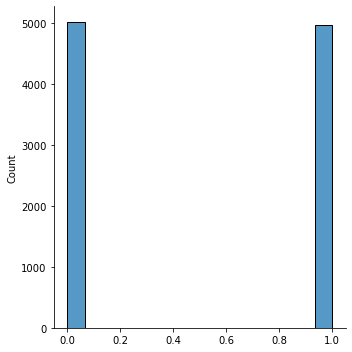

In [27]:
ax = sns.displot(fair)

Now lets make a **biased** coin!

In [28]:
y = myrand(10000, 0, 1)
biased = [1 if i >= 0.8 else 0 for i in y]

Plot it to verify!

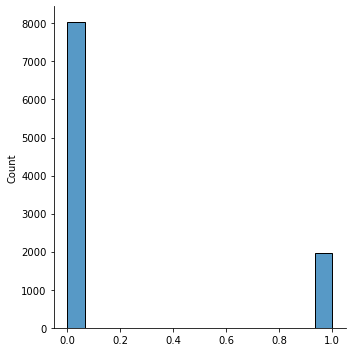

In [29]:
ax = sns.displot(biased)

# Bonus: On the Road To Gaussians!

Use the above, and reasoning from **first principles**, to see how we can turn a uniformly distributed random variable, into an arbitrary Guassian distribution!

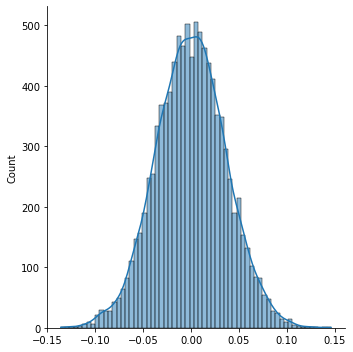

In [38]:
m = []
for i in range(0,10000):
    m.append(np.mean(myrand(1000, -2, 2)))
ax = sns.displot(m, kde=True)